In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!nvidia-smi

Sat Dec 23 13:59:03 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
import zipfile

zip_r = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/pizza_steak.zip", "r")
zip_r.extractall()
zip_r.close()

In [16]:
!ls pizza_steak

test  train


In [17]:
!ls pizza_steak/train

pizza  steak


In [18]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [19]:
#checking how many images  are  in file
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [20]:
# get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [21]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img


['2233395.jpg']
Image shape: (512, 512, 3)


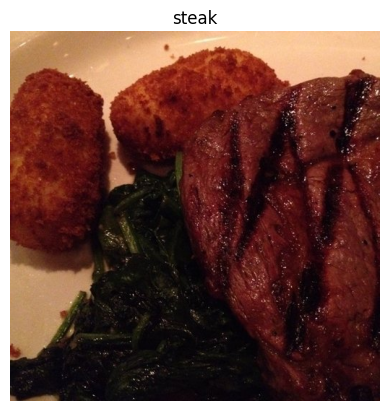

In [22]:
# view random image from traning dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [23]:
# Getting all pixel values between 0 & 1
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed
tf.random.set_seed(40)

# Preprocesss data
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/225.)

# Path to data dir
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=40)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=40)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
# Build a CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 168ms/step - loss: 0.5868 - accuracy: 0.6827 - val_loss: 0.4138 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4700 - accuracy: 0.7887 - val_loss: 0.3989 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 7s 148ms/step - loss: 0.4294 - accuracy: 0.8147 - val_loss: 0.3862 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.3878 - accuracy: 0.8440 - val_loss: 0.3848 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 7s 153ms/step - loss: 0.2888 - accuracy: 0.8940 - val_loss: 0.4466 - val_accuracy: 0.8000


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [26]:
# Build model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 139ms/step - loss: 4.0930 - accuracy: 0.5827 - val_loss: 1.0145 - val_accuracy: 0.6420
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.7101 - accuracy: 0.7133 - val_loss: 0.4882 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.5826 - accuracy: 0.7300 - val_loss: 0.6593 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6161 - accuracy: 0.7527 - val_loss: 0.6966 - val_accuracy: 0.7120
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6400 - accuracy: 0.7480 - val_loss: 0.8712 - val_accuracy: 0.6380


In [27]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 132ms/step - loss: 0.9006 - accuracy: 0.6393 - val_loss: 0.5159 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.4128 - accuracy: 0.8140 - val_loss: 0.3569 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3444 - accuracy: 0.8653 - val_loss: 0.3360 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 8s 162ms/step - loss: 0.2160 - accuracy: 0.9247 - val_loss: 0.5885 - val_accuracy: 0.7400
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.1239 - accuracy: 0.9673 - val_loss: 0.3971 - val_accuracy: 0.8260


<Axes: >

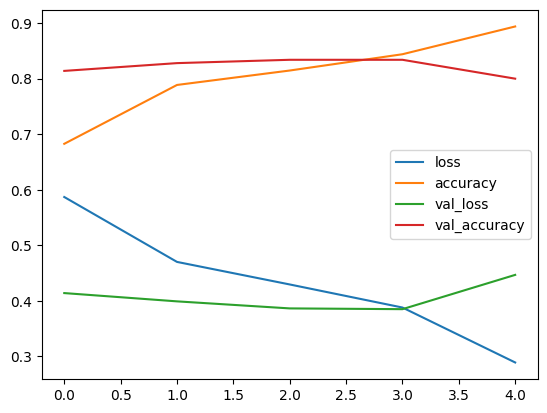

In [29]:
import pandas as pd
pd.DataFrame(history.history).plot()

<Axes: >

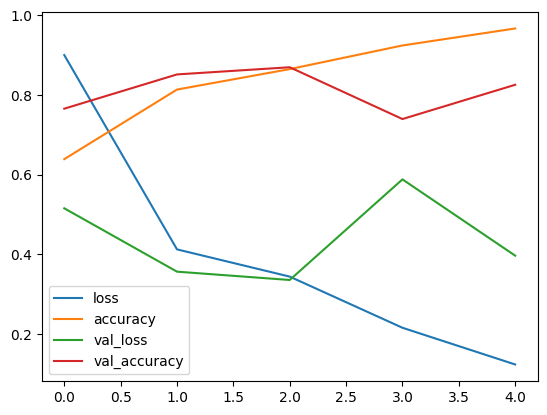

In [30]:
pd.DataFrame(history_3.history).plot()

In [31]:
# Plot validation and traning curves separately
def plot_loss_curves(history):
  '''
  Return seperate loss curves for traning and validation metrics.
  '''
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

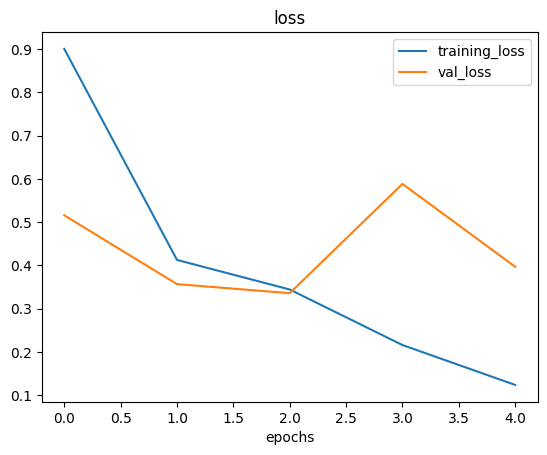

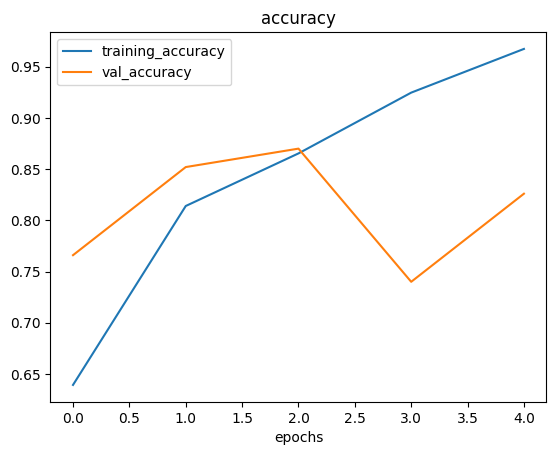

In [32]:
plot_loss_curves(history_3)

In [33]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 155ms/step - loss: 0.6324 - accuracy: 0.6427 - val_loss: 0.5202 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4596 - accuracy: 0.7840 - val_loss: 0.4098 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4189 - accuracy: 0.8147 - val_loss: 0.3675 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3841 - accuracy: 0.8307 - val_loss: 0.4091 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 7s 147ms/step - loss: 0.3555 - accuracy: 0.8560 - val_loss: 0.3916 - val_accuracy: 0.8220


In [34]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, None, None, 10)    0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, None, None, 10)    0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, None, None, 10)   

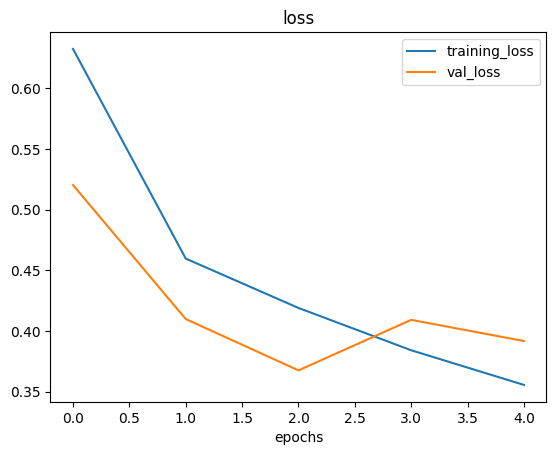

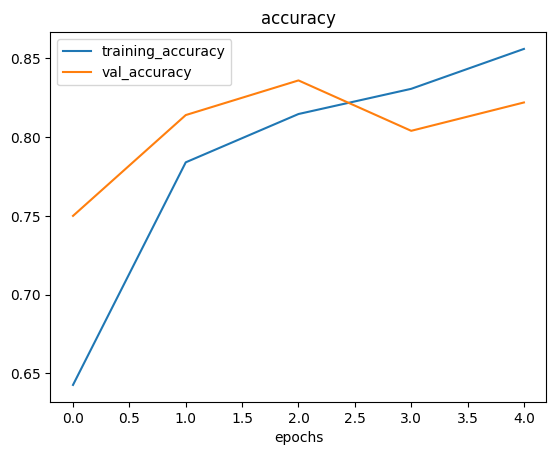

In [35]:
plot_loss_curves(history_4)

In [36]:
# Creating ImageDatagenerator traning instance with data augmentation
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.3,
                                       horizontal_flip=True)

# create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [37]:
# Import data and augment it from traning dir
print("Augmented traning data:")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                      target_size=(224,224),
                                                      batch_size=32,
                                                      class_mode="binary",
                                                      shuffle=False)

# Create nonaugmented train data batch
print("non-augmented traning data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

print("non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented traning data:
Found 1500 images belonging to 2 classes.
non-augmented traning data:
Found 1500 images belonging to 2 classes.
non-augmented test data:
Found 500 images belonging to 2 classes.


In [38]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_aug.next()

(-0.5, 223.5, 223.5, -0.5)

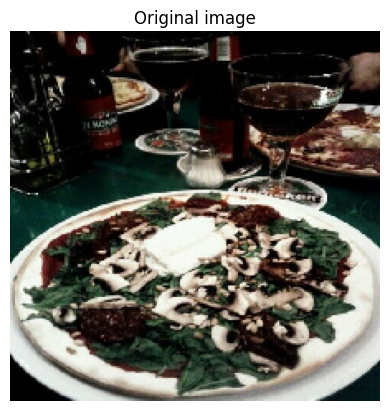

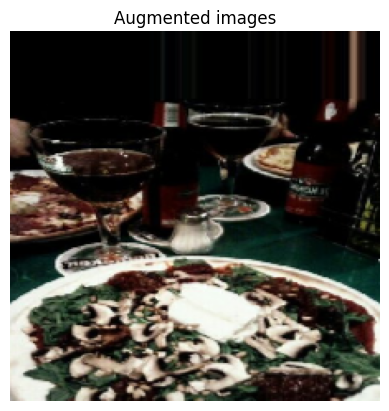

In [39]:
import random
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented images")
plt.axis(False)

In [40]:
# Creating model with augmentation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu",),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 457ms/step - loss: 0.7192 - accuracy: 0.4733 - val_loss: 0.6794 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 23s 485ms/step - loss: 0.6961 - accuracy: 0.5120 - val_loss: 0.6884 - val_accuracy: 0.5160
Epoch 3/5
47/47 [==============================] - 21s 451ms/step - loss: 0.6925 - accuracy: 0.5233 - val_loss: 0.6754 - val_accuracy: 0.5840
Epoch 4/5
47/47 [==============================] - 22s 480ms/step - loss: 0.6785 - accuracy: 0.5767 - val_loss: 0.6665 - val_accuracy: 0.5280
Epoch 5/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6828 - accuracy: 0.5720 - val_loss: 0.6713 - val_accuracy: 0.6800


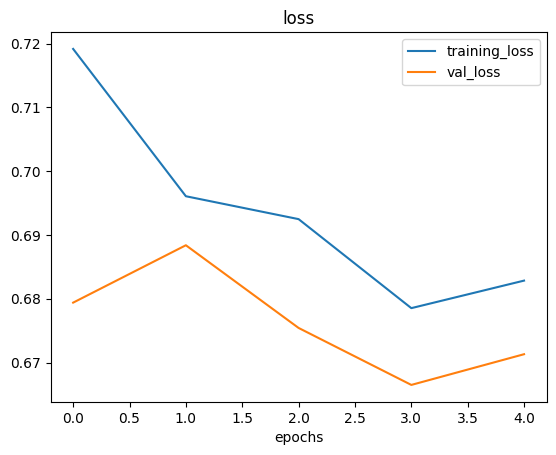

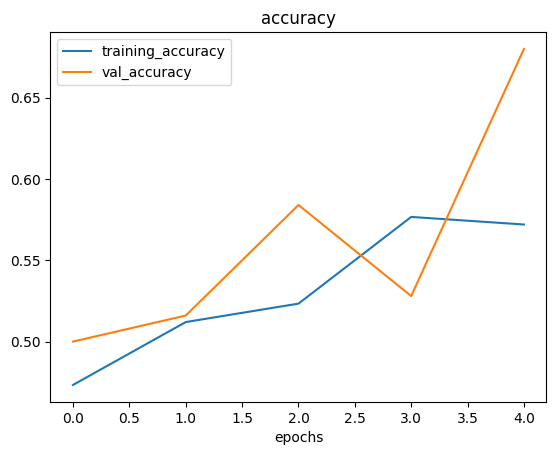

In [41]:
plot_loss_curves(history_5)

--2023-12-23 14:05:03--  https://raw.githubusercontent.com/V-Mak/Food_Image_Classification-/main/Images/steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 493116 (482K) [image/jpeg]
Saving to: ‘steak.jpeg’

steak.jpeg          100%[===================>] 481.56K  --.-KB/s    in 0.02s   

2023-12-23 14:05:03 (19.8 MB/s) - ‘steak.jpeg’ saved [493116/493116]



(-0.5, 2499.5, 1244.5, -0.5)

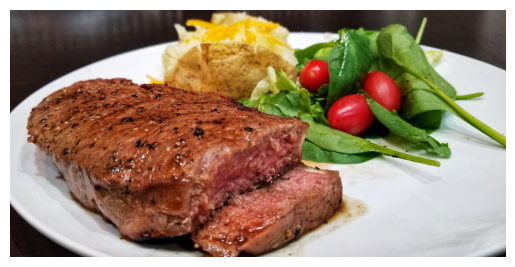

In [42]:
# Making prediction with trained model on new image
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/V-Mak/Food_Image_Classification-/main/Images/steak.jpeg
steak = mpimg.imread("steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [43]:
steak.shape

(1245, 2500, 3)

In [44]:
# function to import image and resize it
def load_prep_image(filename, img_shape=224):
  '''
  Read image from filename and turn it into tensor and reshape it.
  '''
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [45]:
# Load in and preprocess new image
steak = load_prep_image("steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.29264745, 0.30738834, 0.31946817],
        [0.32485119, 0.32092962, 0.34445903],
        [0.30870974, 0.30478817, 0.32831758],
        ...,
        [0.35749522, 0.33788738, 0.31435797],
        [0.3749049 , 0.35529703, 0.33176762],
        [0.37273383, 0.353126  , 0.32959658]],

       [[0.28644902, 0.30118996, 0.31326976],
        [0.31974256, 0.315821  , 0.3393504 ],
        [0.27480453, 0.27088296, 0.29441237],
        ...,
        [0.35357958, 0.33397174, 0.31044233],
        [0.37677616, 0.35716832, 0.3336389 ],
        [0.3560537 , 0.33644587, 0.31291646]],

       [[0.27371517, 0.28845608, 0.30053592],
        [0.29533446, 0.2914129 , 0.3149423 ],
        [0.29608047, 0.2921589 , 0.3156883 ],
        ...,
        [0.364489  , 0.34488115, 0.32135174],
        [0.39401323, 0.37440538, 0.35087597],
        [0.39127028, 0.37166244, 0.348133  ]],

       ...,

       [[0.1584805 , 0.11534323, 0.09965695],
        [0.16

In [46]:
pred = model_3.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 270ms/step


array([[0.74219364]], dtype=float32)

In [47]:
def pred_and_plot(model, filename, class_names=class_names):
  '''
  Import image located at filename, make a prediction with model and plot the image
  '''
  img = load_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 148ms/step


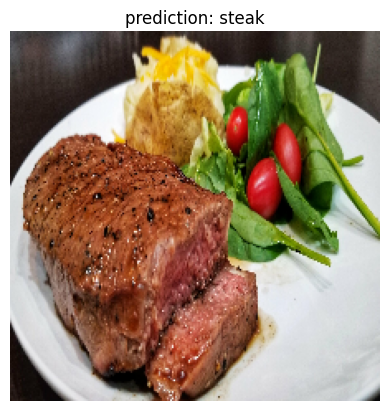

In [48]:
pred_and_plot(model, "steak.jpeg")

--2023-12-23 14:05:05--  https://raw.githubusercontent.com/V-Mak/Food_Image_Classification-/main/Images/pizza_.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘pizza_.jpeg’

pizza_.jpeg         100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2023-12-23 14:05:05 (56.0 MB/s) - ‘pizza_.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 18ms/step


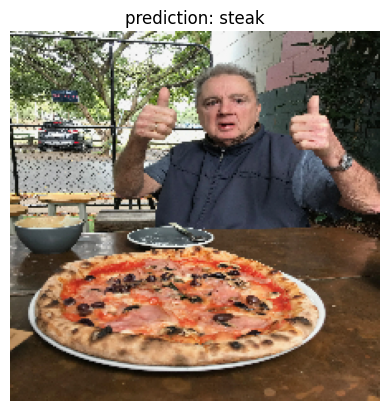

In [49]:
# checking with another image
! wget https://raw.githubusercontent.com/V-Mak/Food_Image_Classification-/main/Images/pizza_.jpeg

pred_and_plot(model, "pizza_.jpeg")

# Multi-class Image Classification

In [11]:
import zipfile

# Unzip data
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [50]:
import os

# Walk thorough 10 classes of data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images '{dirpath}'.")

There are 2 directories and 0 images '10_food_classes_all_data'.
There are 10 directories and 0 images '10_food_classes_all_data/train'.
There are 0 directories and 750 images '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images '10_food_classes_all_data/train/pizza'.
There are 10 directories and 0 imag

In [51]:
# setup train and test directories
train_dir ="10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [52]:
import pathlib
import numpy as np
data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3830277.jpg']
Image shape: (512, 512, 3)


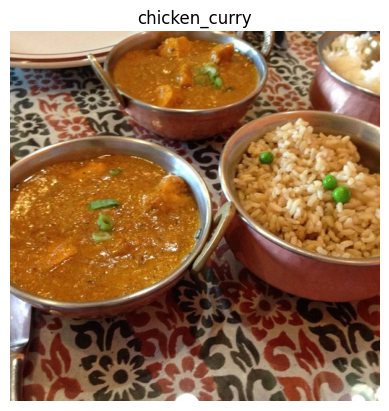

In [53]:
# Visualizes the data
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [54]:
# preprocessing thw data

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [55]:
# create model
model_6= tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, input_shape=(224,224,3), activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_6.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 36s 146ms/step - loss: 2.0689 - accuracy: 0.2637 - val_loss: 1.9282 - val_accuracy: 0.3256
Epoch 2/5
235/235 [==============================] - 28s 121ms/step - loss: 1.6854 - accuracy: 0.4261 - val_loss: 1.8943 - val_accuracy: 0.3428
Epoch 3/5
235/235 [==============================] - 30s 128ms/step - loss: 1.1849 - accuracy: 0.6077 - val_loss: 2.1299 - val_accuracy: 0.3236
Epoch 4/5
235/235 [==============================] - 35s 147ms/step - loss: 0.6736 - accuracy: 0.8037 - val_loss: 2.3855 - val_accuracy: 0.3164
Epoch 5/5
235/235 [==============================] - 30s 126ms/step - loss: 0.3203 - accuracy: 0.9177 - val_loss: 3.0860 - val_accuracy: 0.2964


In [56]:
# Evaluate
model_6.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 3.0860 - accuracy: 0.2964


[3.085991144180298, 0.2964000105857849]

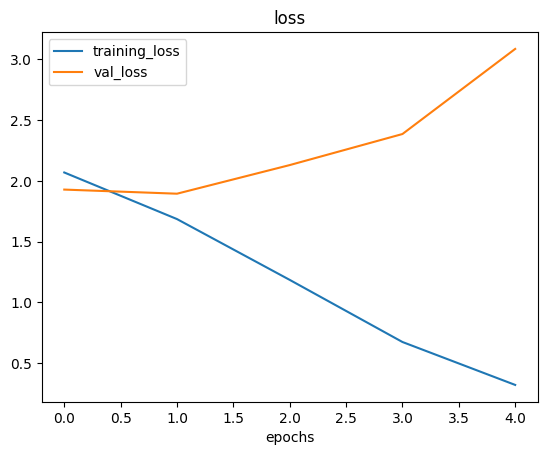

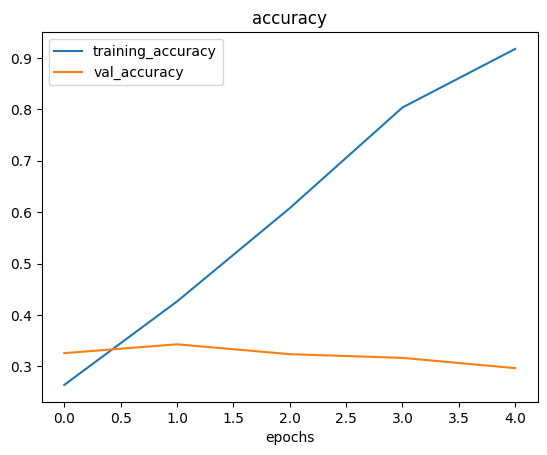

In [57]:
plot_loss_curves(history_6)

In [58]:
# Using Data Augmentation
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range =0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224,224),
                                                       batch_size=32,
                                                       class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [59]:
# make another model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile model
model_7.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 458ms/step - loss: 2.3709 - accuracy: 0.1515 - val_loss: 2.1229 - val_accuracy: 0.2480
Epoch 2/5
235/235 [==============================] - 108s 459ms/step - loss: 2.1400 - accuracy: 0.2227 - val_loss: 1.9767 - val_accuracy: 0.3128
Epoch 3/5
235/235 [==============================] - 109s 462ms/step - loss: 2.0465 - accuracy: 0.2817 - val_loss: 1.9148 - val_accuracy: 0.3168
Epoch 4/5
235/235 [==============================] - 126s 537ms/step - loss: 1.9959 - accuracy: 0.3047 - val_loss: 1.8935 - val_accuracy: 0.3240
Epoch 5/5
235/235 [==============================] - 111s 473ms/step - loss: 1.9685 - accuracy: 0.3127 - val_loss: 1.8595 - val_accuracy: 0.3516


In [60]:
model_7.evaluate(test_data)

79/79 [==============================] - 8s 97ms/step - loss: 1.8595 - accuracy: 0.3516


[1.859531283378601, 0.3515999913215637]

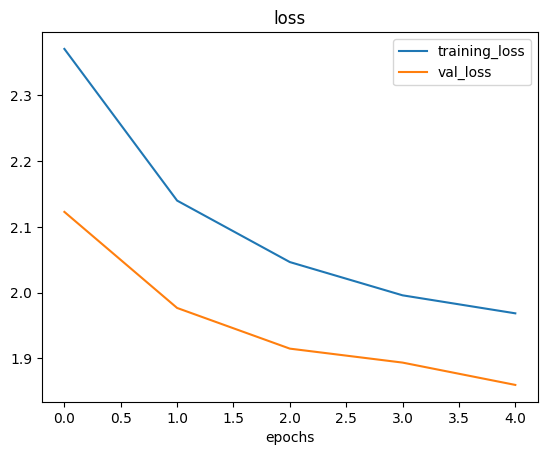

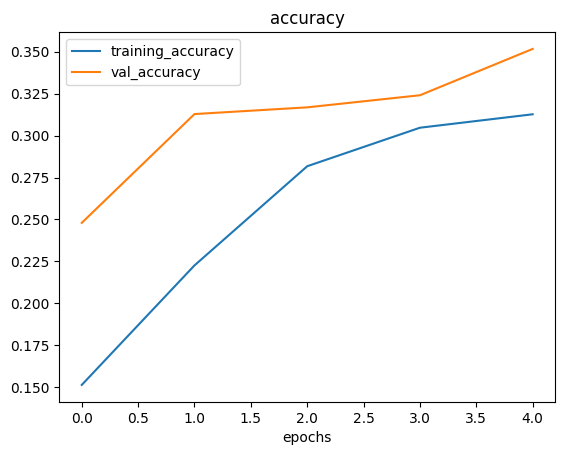

In [61]:
plot_loss_curves(history_7)

In [62]:
! wget https://raw.githubusercontent.com/V-Mak/Food_Image_Classification-/main/Images/sushi.jpeg
! wget https://raw.githubusercontent.com/V-Mak/Food_Image_Classification-/main/Images/hamburger.jpeg

--2023-12-23 14:17:56--  https://raw.githubusercontent.com/V-Mak/Food_Image_Classification-/main/Images/sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘sushi.jpeg’

sushi.jpeg          100%[===================>]   1.64M  --.-KB/s    in 0.04s   

2023-12-23 14:17:57 (45.7 MB/s) - ‘sushi.jpeg’ saved [1725178/1725178]

--2023-12-23 14:17:57--  https://raw.githubusercontent.com/V-Mak/Food_Image_Classification-/main/Images/hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

In [63]:
# making changes in pred_and_plot function for multi-class classification

def pred_and_plot(model, filename, class_names=class_names):
  '''
  Import image located at filename, make a prediction with model and plot the image
  '''
  img = load_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 102ms/step


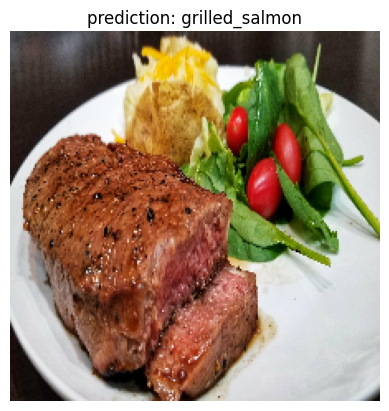

In [64]:
pred_and_plot(model=model_7,
              filename="steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 30ms/step


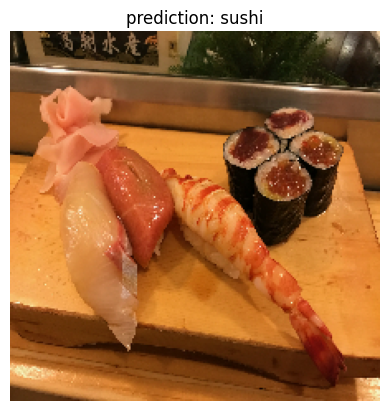

In [65]:
pred_and_plot(model=model_7,
              filename="sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 17ms/step


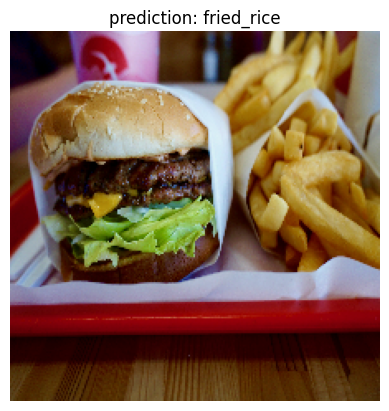

In [66]:
pred_and_plot(model=model_7,
              filename="hamburger.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 18ms/step


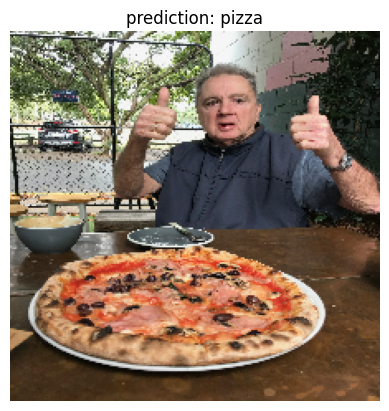

In [67]:
pred_and_plot(model=model_7,
              filename="pizza_.jpeg",
              class_names=class_names)

In [68]:
# Save Model
model_7.save("saved_model_7")

In [69]:
loaded_model_7 = tf.keras.models.load_model("saved_model_7")
loaded_model_7.evaluate(test_data)

79/79 [==============================] - 7s 91ms/step - loss: 1.8595 - accuracy: 0.3516


[1.859531044960022, 0.3515999913215637]

**As you can see my model only has 37% of accuracy even with augmentation so I will now use transfer learning Feature-Extraction for my model for more accurate result and I will only use 10% of my multi-class classification food data**

## Transfer Learning: Feature Extraction

In [13]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [14]:
import os

# walk through data directory

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directory and {len(filenames)} images in '{dirpath}'.")

There are 2 directory and 0 images in '10_food_classes_10_percent'.
There are 10 directory and 0 images in '10_food_classes_10_percent/train'.
There are 0 directory and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directory and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directory and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directory and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directory and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directory and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directory and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directory and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directory and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directory and 75 images in '10_food_classes_10_percent/train/pizza'.
There are

In [ ]:
# setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training Images")
train_data_10_per = train_datagen.flow_from_directory(train_dir,
                                                      target_size=IMG_SHAPE,
                                                      batch_size=BATCH_SIZE,
                                                      class_mode="categorical")

print("Testing Images")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Training Images
Found 750 images belonging to 10 classes.
Testing Images
Found 2500 images belonging to 10 classes.


In [ ]:
# Creating a tensorboard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log file to: {log_dir} ")
  return tensorboard_callback

In [ ]:
# Using following two model
resnet_url = "https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/50-feature-vector/versions/2"

efficientnet_url = "https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/TensorFlow2/variations/b0-classification/versions/1"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers


In [ ]:
# creating function to create model from url
def create_model(model_url, num_classes=10):
  '''
  Takes tensorflow hub URL abd create model with it
  '''
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer",
                                           input_shape=IMG_SHAPE+(3,))

  # Create model
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])
  return model

In [ ]:
# creating model using resnet
resnet_model = create_model(resnet_url,
                            num_classes=train_data_10_per.num_classes)

In [ ]:
resnet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
# Compile model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

# Fit the model
resnet_history = resnet_model.fit(train_data_10_per,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_per),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="renet50v2",
                                                                         )])

Saving TensorBoard log file to: tensorflow_hub/renet50v2/20231217-075814 
Epoch 1/5
24/24 [==============================] - 21s 603ms/step - loss: 2.0416 - accuracy: 0.3067 - val_loss: 1.2634 - val_accuracy: 0.5888
Epoch 2/5
24/24 [==============================] - 13s 548ms/step - loss: 0.9324 - accuracy: 0.7120 - val_loss: 0.8853 - val_accuracy: 0.7136
Epoch 3/5
24/24 [==============================] - 11s 465ms/step - loss: 0.6297 - accuracy: 0.8293 - val_loss: 0.7712 - val_accuracy: 0.7560
Epoch 4/5
24/24 [==============================] - 14s 591ms/step - loss: 0.4749 - accuracy: 0.8760 - val_loss: 0.7110 - val_accuracy: 0.7756
Epoch 5/5
24/24 [==============================] - 11s 461ms/step - loss: 0.3817 - accuracy: 0.9133 - val_loss: 0.6800 - val_accuracy: 0.7828


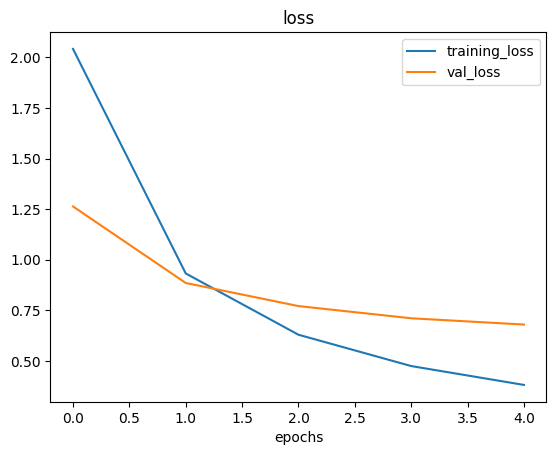

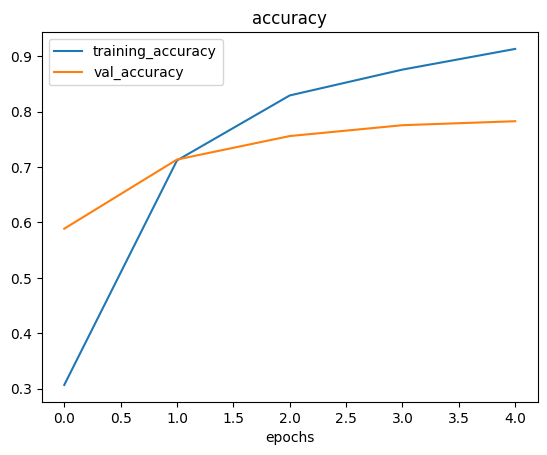

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
# create another model using efficientnet
efficientnet_model = create_model(model_url=efficientnet_url,
                                  num_classes=train_data_10_per.num_classes)

# Compile model
efficientnet_model.compile(loss="categorical_crossentropy",
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

# Fit the model
efficientnet_history = efficientnet_model.fit(train_data_10_per,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_10_per),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     experiment_name="efficientnetb0")])

Saving TensorBoard log file to: tensorflow_hub/efficientnetb0/20231217-080229 
Epoch 1/5
24/24 [==============================] - 24s 570ms/step - loss: 2.3031 - accuracy: 0.1640 - val_loss: 2.2946 - val_accuracy: 0.2396
Epoch 2/5
24/24 [==============================] - 11s 451ms/step - loss: 2.2883 - accuracy: 0.2840 - val_loss: 2.2799 - val_accuracy: 0.3276
Epoch 3/5
24/24 [==============================] - 10s 419ms/step - loss: 2.2738 - accuracy: 0.3747 - val_loss: 2.2650 - val_accuracy: 0.4284
Epoch 4/5
24/24 [==============================] - 10s 429ms/step - loss: 2.2598 - accuracy: 0.4453 - val_loss: 2.2504 - val_accuracy: 0.5112
Epoch 5/5
24/24 [==============================] - 10s 441ms/step - loss: 2.2456 - accuracy: 0.5213 - val_loss: 2.2359 - val_accuracy: 0.5392


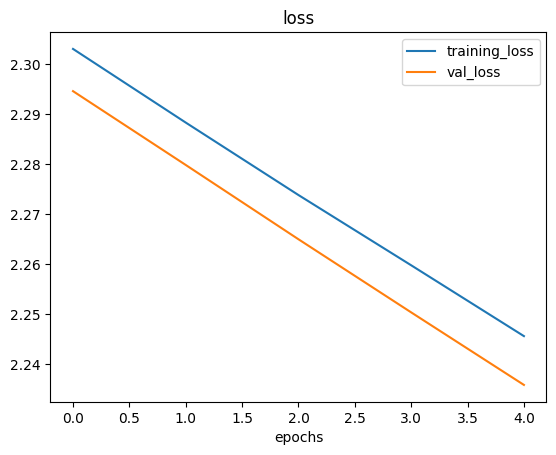

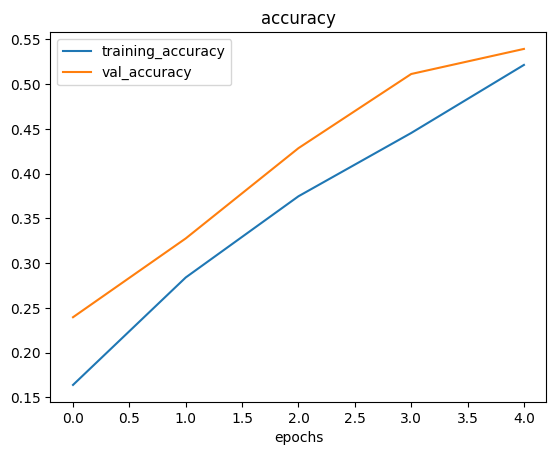

In [ ]:
plot_loss_curves(efficientnet_history)

1/1 [==============================] - 2s 2s/step


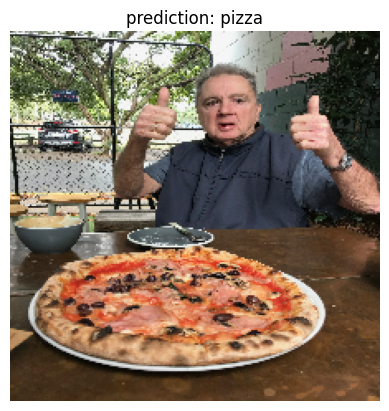

In [ ]:
pred_and_plot(model=resnet_model,
              filename="pizza_.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 117ms/step


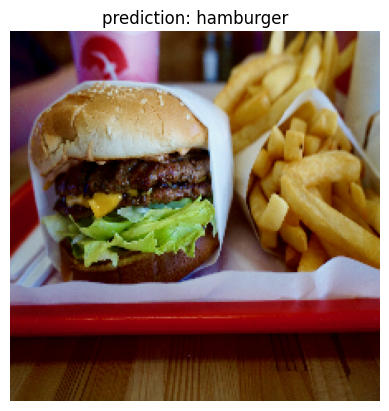

In [ ]:
pred_and_plot(model=resnet_model,
              filename="hamburger.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 22ms/step


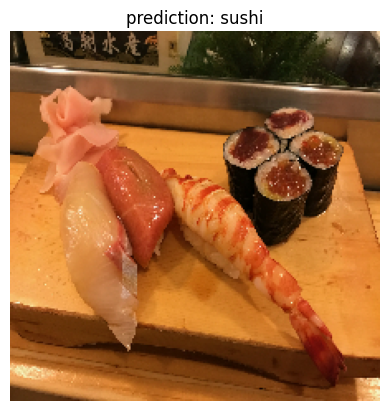

In [ ]:
pred_and_plot(model=resnet_model,
              filename="sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 23ms/step


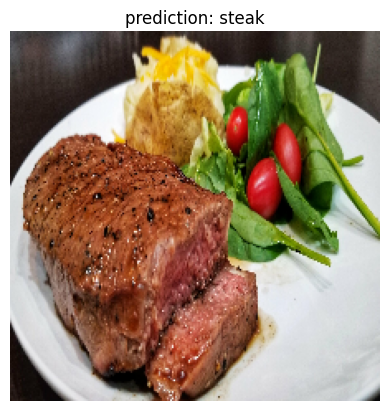

In [ ]:
pred_and_plot(model=resnet_model,
              filename="steak.jpeg",
              class_names=class_names)